In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris.shape

(150, 6)

In [5]:
iris.drop('Id',axis=1,inplace=True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_columns = ['Species']

In [7]:
speciesdict = {0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
# for i in range (3):
#     print(speciesdict[i])

In [8]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
iris[target_columns] = lbl_en.fit_transform(iris[target_columns])
iris

d:\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

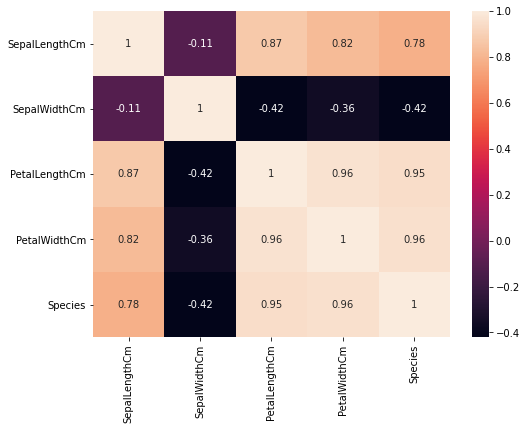

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(iris.corr(),annot=True)

<AxesSubplot:xlabel='Species'>

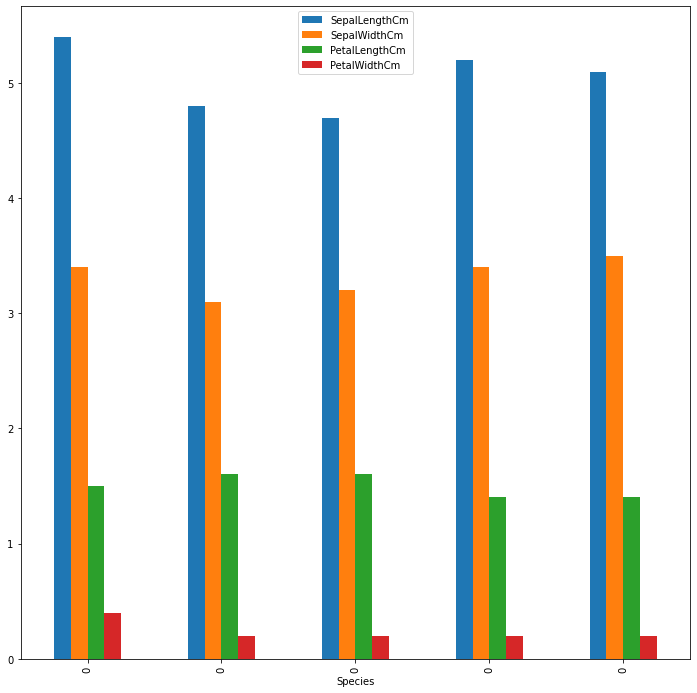

In [10]:
iris.sort_values(target_columns,ascending=False).tail(5).plot(x='Species',y=[clmn for clmn in feature_columns],kind='bar',figsize=(12,12))

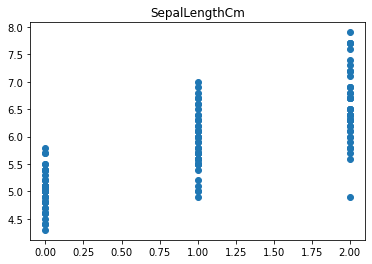

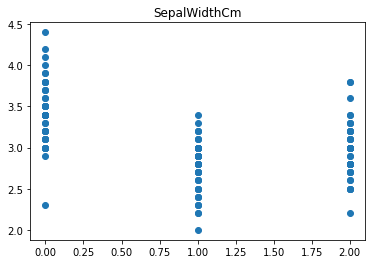

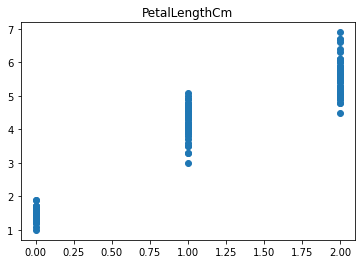

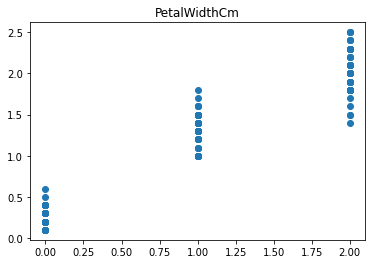

In [11]:
for clmn in feature_columns:
    plt.plot(iris['Species'],iris[clmn],'o')
    plt.title(clmn)
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(iris.drop('Species',axis=1),iris.Species,test_size=0.2,random_state=42)

pandas.core.frame.DataFrame

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

log_pred_train = log_reg.predict(x_train)
log_pred_test = log_reg.predict(x_test)

# print(confusion_matrix(y_train,log_pred_train))
print(accuracy_score(y_train,log_pred_train))
# print(confusion_matrix(log_pred_test,y_test))
print(accuracy_score(log_pred_test,y_test))

0.975
1.0


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

knn_pred_train = knn_clf.predict(x_train)
knn_pred_test = knn_clf.predict(x_test)

# print(confusion_matrix(y_train,log_pred_train))
print(accuracy_score(y_train,knn_pred_train))
# print(confusion_matrix(log_pred_test,y_test))
print(accuracy_score(knn_pred_test,y_test))

0.9666666666666667
1.0


In [15]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

xgb_pred_train = xgb.predict(x_train)
xgb_pred_test = xgb.predict(x_test)

print(confusion_matrix(y_train,xgb_pred_train))
print(accuracy_score(y_train,xgb_pred_train))
print(confusion_matrix(xgb_pred_test,y_test))
print(accuracy_score(xgb_pred_test,y_test))

[19:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_pred_train = dt.predict(x_train)
dt_pred_test = dt.predict(x_test)

print(confusion_matrix(y_train,dt_pred_train))
print(accuracy_score(y_train,dt_pred_train))
print(confusion_matrix(dt_pred_test,y_test))
print(accuracy_score(dt_pred_test,y_test))

[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [23]:
import joblib
model = joblib.dump(xgb,'Iris.pkl')

In [42]:
ftr={}
ftr['sl'] = 5.9
ftr['sw'] = 3.4
ftr['pl'] = 5.6
ftr['pw'] = 1.4
ftr

{'sl': 5.9, 'sw': 3.4, 'pl': 5.6, 'pw': 1.4}

In [43]:
testdt = pd.DataFrame({'x':ftr}).transpose()
testdt

,pl,pw,sl,sw
x,5.6,1.4,5.9,3.4


In [44]:
irismdl = joblib.load('Iris.pkl')
mdlpred = irismdl.predict(testdt)
mdlpred

array([2])